In [6]:
import numpy as np
import matplotlib.pyplot as plt
from Newtonsys import Newtonsys
from time import time
import scipy as sp

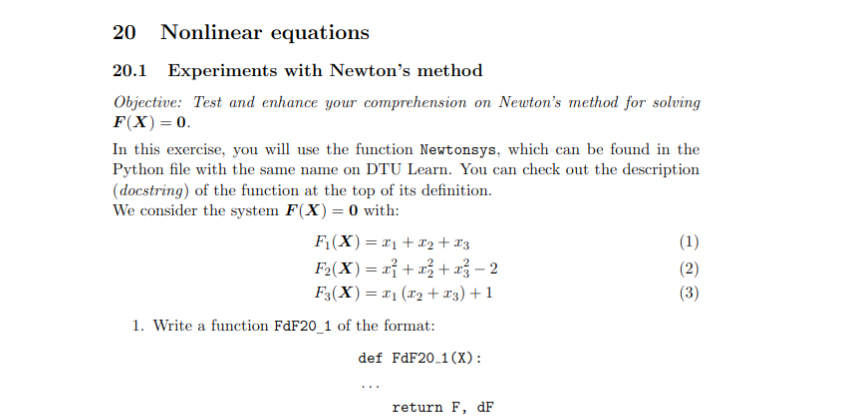
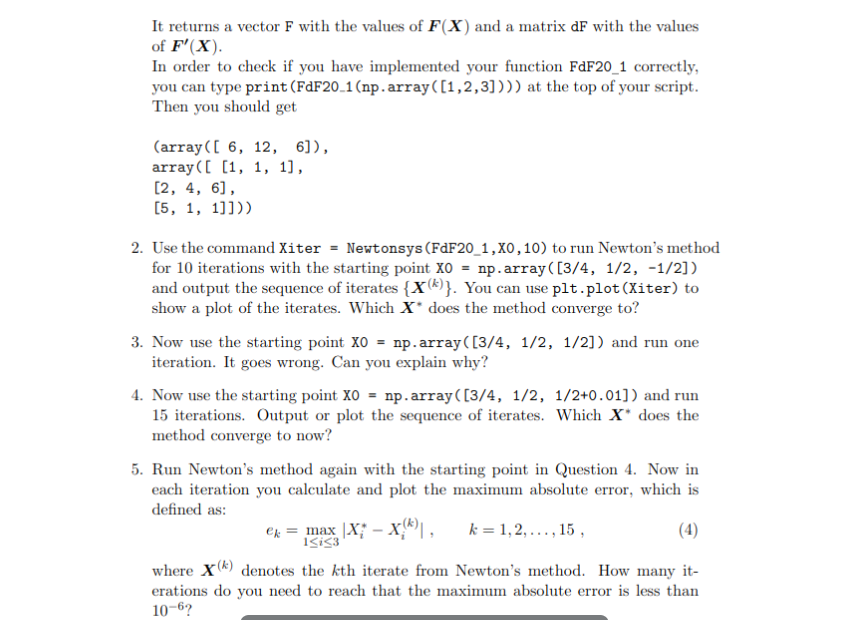

In [2]:
def FdF201(X):
    x1, x2, x3 = X
    F1 = x1 + x2 + x3
    F2 = x1**2 + x2**2 + x3**2 - 2
    F3 = x1*(x2+x3) + 1

    F = np.array([F1, F2, F3])
    dF = np.array([[1,1,1],[2*x1, 2*x2, 2*x3],[x2+x3,x1,x1]])
    
    return F, dF


In [3]:
print(FdF201(np.array([1,2,3])))

(array([ 6, 12,  6]), array([[1, 1, 1],
       [2, 4, 6],
       [5, 1, 1]]))


In [4]:
X0 = np.array([3/4, 1/2, -1/2])
Xiter = Newtonsys(FdF201,X0,10)

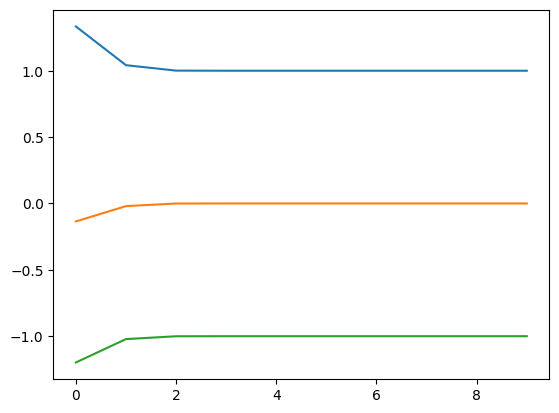

In [5]:
plt.plot(Xiter)

In [7]:
X0 = np.array([3/4, 1/2, 1/2])
Xiter = Newtonsys(FdF201,X0,10)

LinAlgError: Singular matrix

The error indicates that the matrix we are trying to solve for is not invertible. 

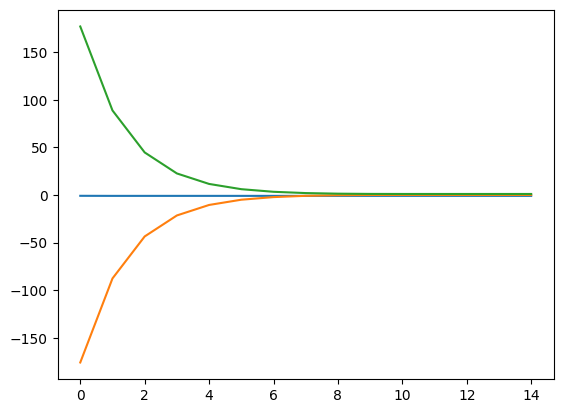

In [8]:
X0 = np.array([3/4, 1/2, 1/2+0.01])
Xiter = Newtonsys(FdF201,X0,15)
plt.plot(Xiter)

In [9]:
np.linalg.det(FdF201(X0)[1])

np.float64(0.005199999999999981)

The determinant is nearly 0 which makes the system highly unstable and very sensitive to even slight changes in A or b. 

In [10]:
np.max(Xiter[1])

np.float64(88.74240337496818)

The number of iterations to get the error to be less than 10^6: 13
The number of iterations to get the error to be less than 10^6: 14
The number of iterations to get the error to be less than 10^6: 15


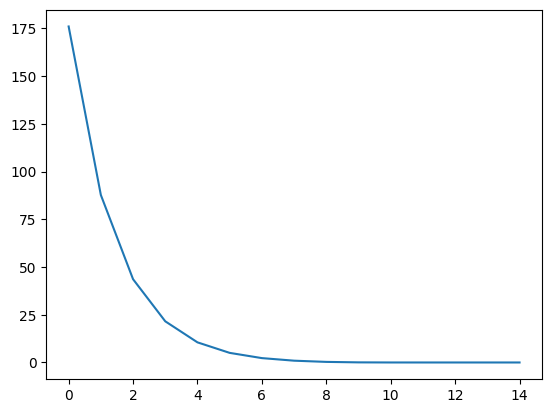

In [11]:
err = []
for k in range(15):
    err.append(np.max(np.abs(Xiter[-1] - Xiter[k])))
    if err[k]<10**(-6):
        print("The number of iterations to get the error to be less than 10^6:", k+1)
plt.plot(err)

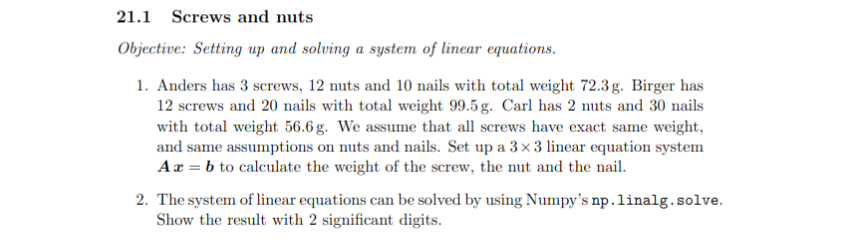
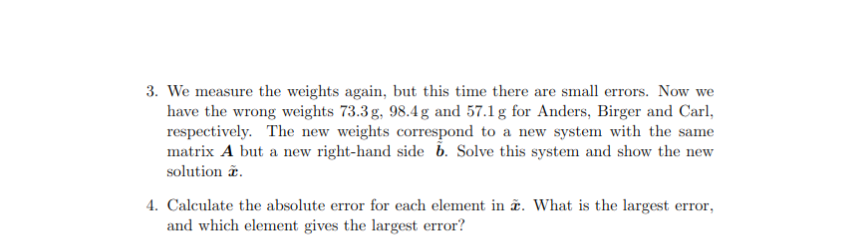

In [12]:
A = np.array([[3,12,13],[12,0,12],[0,2,30]])
b1 = np.array([72.3,99.5,56.6])
b2 = np.array([73.3,98.4,57.1])
x1 = np.linalg.solve(A, b1)
x2 = np.linalg.solve(A, b2)
x1, x2

(array([6.5729902 , 2.51985294, 1.71867647]),
 array([6.47117647, 2.61764706, 1.72882353]))

In [13]:
np.abs(x2-x1)

array([0.10181373, 0.09779412, 0.01014706])

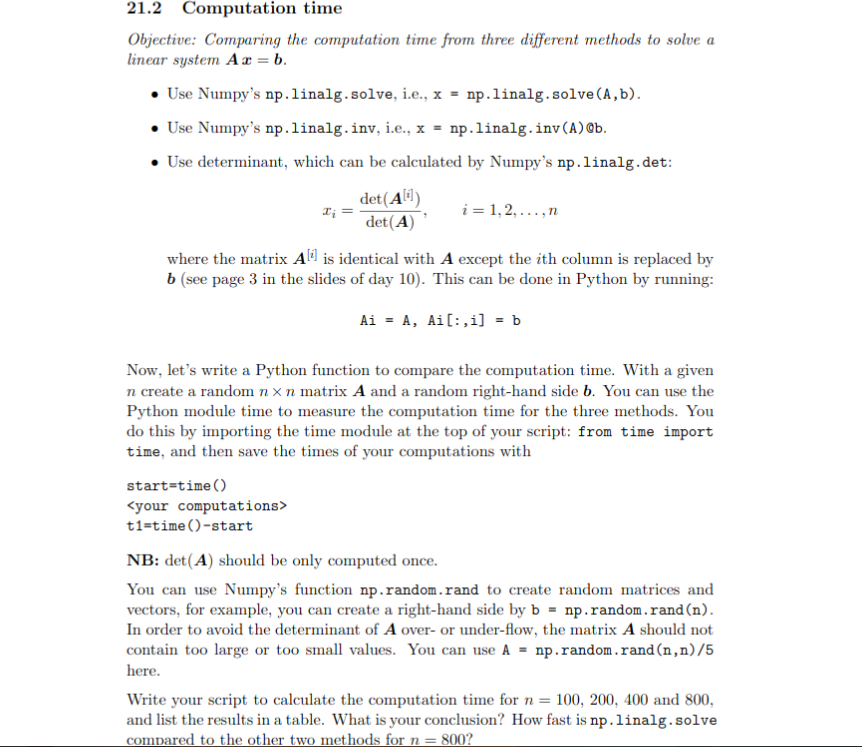

In [14]:
N = [100, 200, 400, 800]
for n in N:
    A = np.random.rand(n,n)/5
    b = np.random.rand(n)
    start = time()
    x = np.linalg.solve(A,b)
    end = time()
    print("Numpy's solve:", end-start)
    start = time()
    x = np.linalg.inv(A)@b
    end = time()
    print("Numpy's inverse:", end-start)
    start = time()
    detA = np.linalg.det(A)
    for i in range(n):
        Ai = A
        Ai[:,i] = b
        detAi = np.linalg.det(Ai)
        xi = detAi/detA
    end = time()
    print("Cramer's rule:", end-start, "\n")


Numpy's solve: 0.00014829635620117188
Numpy's inverse: 0.0030341148376464844
Cramer's rule: 0.011311769485473633 

Numpy's solve: 0.0006358623504638672
Numpy's inverse: 0.0015444755554199219
Cramer's rule: 0.09835433959960938 

Numpy's solve: 0.0030663013458251953
Numpy's inverse: 0.0046122074127197266
Cramer's rule: 1.0183050632476807 

Numpy's solve: 0.019057512283325195
Numpy's inverse: 0.025996685028076172
Cramer's rule: 6.924508333206177 



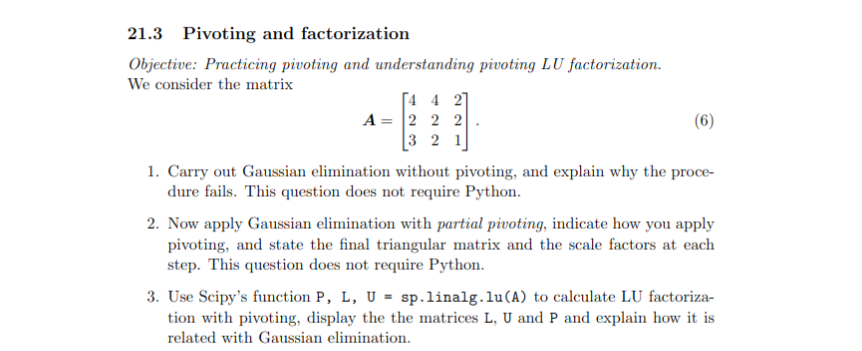

It fails because the second row after the first iteration will have two zeros, which later would cause devision by 0.

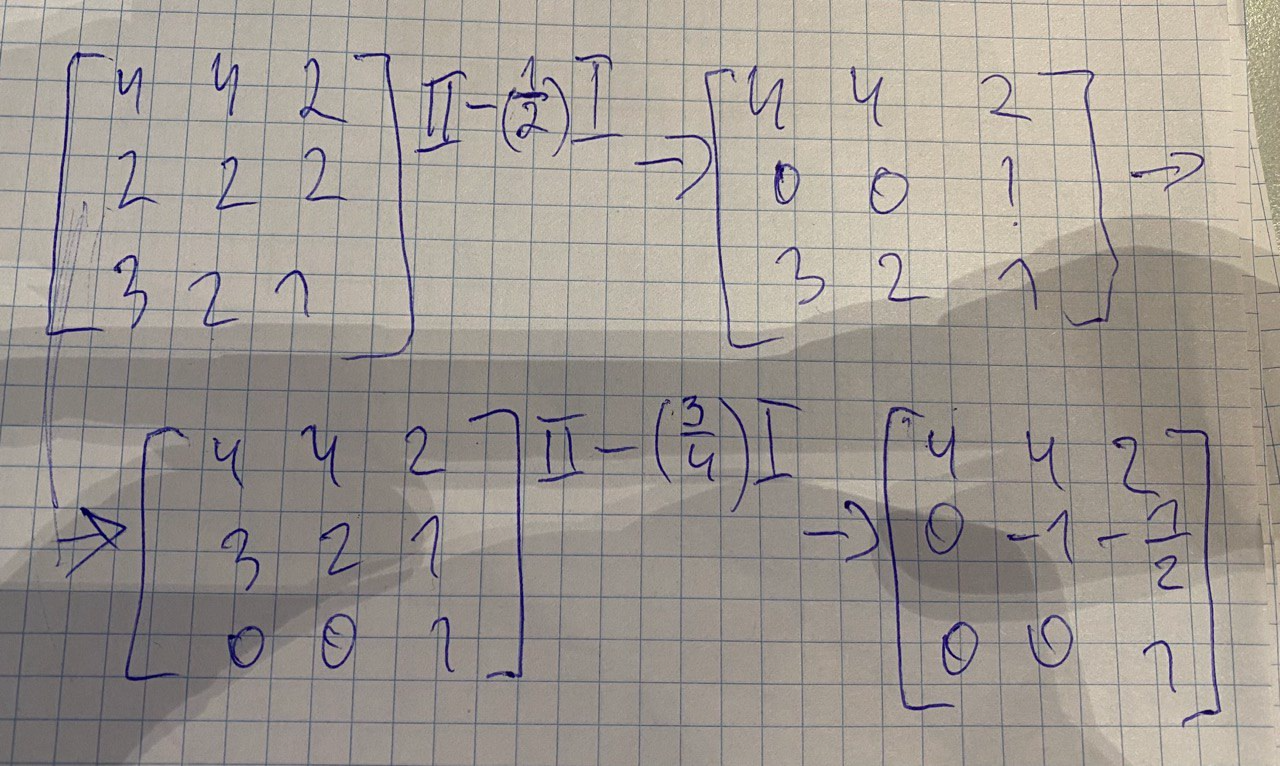

In [15]:
P, L, U = sp.linalg.lu(A)
display(P, L, U)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.51296657, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.46899061, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.36246548, 0.5       , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.92860168, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.08907567, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

array([[9.98576137e-01, 9.98576137e-01, 9.98576137e-01, ...,
        9.98576137e-01, 9.98576137e-01, 9.98576137e-01],
       [0.00000000e+00, 1.11022302e-16, 1.11022302e-16, ...,
        1.11022302e-16, 1.11022302e-16, 1.11022302e-16],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [16]:
def Scaled_Partial_Pivoting(A, b):
    n = A.shape[0]
    s = np.max(np.abs(A), axis=1)
    P = np.identity(n)

    for k in range(n-1):
        max_scaled_a = 0
        max_index = k
        #find the biggest scaled element and its row index
        for l in range(k,n):
            if np.abs(A[l,k]/s[l]) >= max_scaled_a:
                max_scaled_a = np.abs(A[l,k]/s[l])
                max_index = l
        
        #update the order
        A[[k,max_index]] = A[[max_index,k]]
        P[[k,max_index]] = P[[max_index,k]]
        b[[k, max_index]] = b[[max_index, k]]
        s[k], s[max_index] = s[max_index], s[k]
        
        #perform elimination
        for i in range(k + 1, n):
            xmult = A[i, k] / A[k, k]
            A[i, k:] = A[i, k:] - xmult * A[k, k:]
            b[i] = b[i] - xmult * b[k]
    #return upper triangle, permutation matrices and the vector b 
    return A, P, b

In [17]:
n = 4
A = np.random.rand(n,n)/5
b = np.random.rand(n)
display(A, b)

array([[0.05707219, 0.13545118, 0.12390101, 0.07104938],
       [0.04573124, 0.0486164 , 0.10416222, 0.08009422],
       [0.10274074, 0.01989062, 0.15499053, 0.09242792],
       [0.15717443, 0.07333789, 0.17592844, 0.12965282]])

array([0.10363997, 0.71496343, 0.29239797, 0.64208723])

In [18]:
A,P,b = Scaled_Partial_Pivoting(A,b)
A, P, b

(array([[ 1.57174431e-01,  7.33378935e-02,  1.75928443e-01,
          1.29652817e-01],
        [ 0.00000000e+00,  1.08821190e-01,  6.00189786e-02,
          2.39706698e-02],
        [ 0.00000000e+00,  0.00000000e+00,  3.79294297e-02,
          3.63619205e-02],
        [ 0.00000000e+00,  3.46944695e-18,  0.00000000e+00,
         -3.93128110e-02]]),
 array([[0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]]),
 array([ 0.64208723, -0.1295107 ,  0.56060701, -0.98041987]))

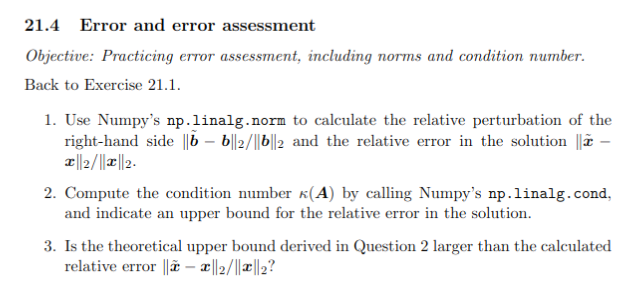

In [19]:
A = np.array([[3,12,13],[12,0,12],[0,2,30]])
b1 = np.array([72.3,99.5,56.6])
b2 = np.array([73.3,98.4,57.1])
x1 = np.linalg.solve(A, b1)
x2 = np.linalg.solve(A, b2)

In [20]:
b1_norm = np.linalg.norm(b1)
rel_err_b = np.linalg.norm(np.abs(b2-b1))/b1_norm

In [21]:
x1_norm = np.linalg.norm(x1)
rel_err_x = np.linalg.norm(np.abs(x2-x1))/x1_norm

In [22]:
rel_err_b, rel_err_x

(np.float64(0.011584393206309853), np.float64(0.019532510767087955))

In [23]:
np.linalg.cond(A)

np.float64(3.4853066945659106)

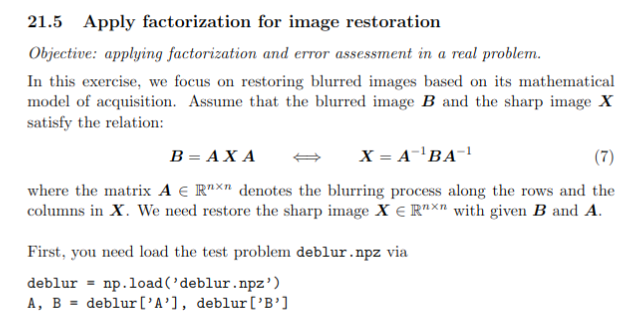
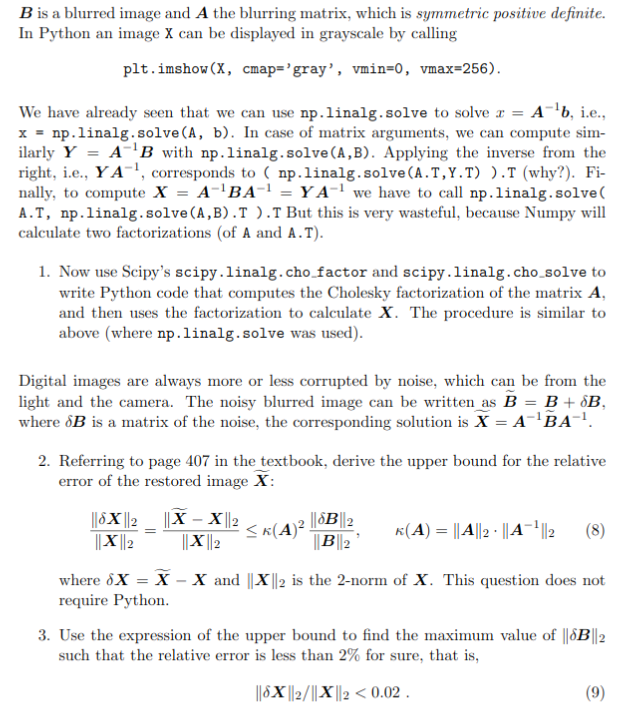
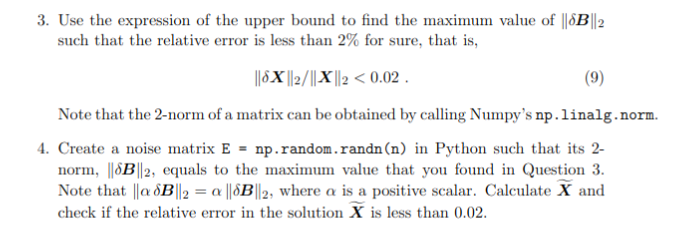

In [24]:
deblur = np.load('deblur.npz')
A, B = deblur['A'], deblur['B'] #B is a blurred img and A is a blurr matrix

### Method for funding X
It is more computationally efficient to find X over np.linalg.solve that over inversion directly as the LU factorization that is used in np.linalg.solve takes third of the computational complexity. Additionally, it is more numerically stable. inv in numpy is a smart algo that actually solves Ax=I equation

### Explanation to the finding the X over linal.solve
\begin{gather*}
X = A^{-1}BA^{-1}\\
Y = A^{-1}B \Rightarrow X=YA^{-1}\\
X^T = (YA^{-1})^T = (A^{-1})^TY^T, \, \, (A^{-1})^T = (A^{T})^{-1}\\
A^TX^T = Y^T
\end{gather*}

In [46]:
start = time()
A_inv = np.linalg.inv(A)
X1 = A_inv@B@A_inv
end = time()
end-start

0.04409193992614746

In [47]:
start = time()
Y = np.linalg.solve(A,B)
X = np.linalg.solve(A.T,Y.T).T
end = time()
end-start

0.049054861068725586

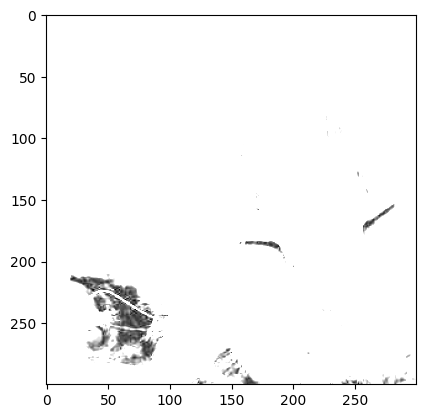

In [48]:
plt.imshow(X, cmap='gray', vmin=0, vmax=25)

In [49]:
from scipy.linalg import cho_factor, cho_solve
start = time()
# Compute the Cholesky factorization
c, lower = cho_factor(A, lower=True)  # Compute lower triangular factor

# Solve the system Ax = b
Y = cho_solve((c, lower), B)

c, lower = cho_factor(A.T, lower=True)
X1 = cho_solve((c,lower),Y.T).T
end = time()
end-start

0.017961502075195312

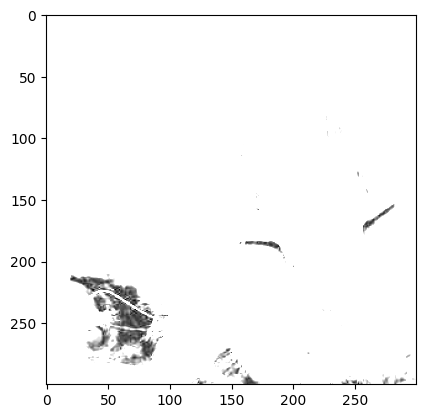

In [44]:
plt.imshow(X1, cmap='gray', vmin=0, vmax=25)

In [8]:
def FdF20_2(X, omega):
    x, y = X
    F = np.array([[(x-np.cos(omega))**2 + (y-np.sin(omega))**2 - 25],[(x-np.sin(omega))**2 + (y-6-np.cos(omega))**2 - 25]])
    dF = np.array([[2*x - 2*np.cos(omega), 2*y-2*sin(omega)],[2*x-2*sin(omega), 2*y-12-2*cos(omega)]])
    return F, dF